In [221]:
import json
import numpy as np
import matplotlib.pyplot as plt
with open('data.json') as f:
    data = json.load(f)
with open('data_orig.json') as f:
    data_orig = json.load(f)
data["acceleration"] += 0.6*np.array([np.random.randn() for _ in range(100)])

Finding the acceleration

In [222]:
# a = []
# t = data["time"]
# v = data["vel"]
# pos = data["pos"]
# v0_calc = 0
# s0_calc = 0
# for i in range(len(v)):
#     temp = ((v[i]**2) - (v0_calc**2) )/ (2*(pos[i] - s0_calc))
#     a.append(temp if -1 < temp < 1 else 0)
#     s0_calc = pos[i]
#     v0_calc = v[i]
# data["acceleration"] = a
# plt.figure()
# plt.plot(t,a)



# Applying the kalman filter for Speed

## INITIALIZE

In [223]:
SPEED = 0
SPEED_VARIANCE_READING = 3 #KNOW FROM EXPERIMENTATION
SPEED_VARIANCE = 100

In [224]:
## PREDICT

In [225]:
def SPEED_PREDICT(dt,speed,a):
    return speed + a*dt

In [226]:
## UPDATE

In [227]:
def SPEED_UPDATE(reading_mean,reading_variance,current_speed,current_variance , dt , current_acceleration):
    prediction_mean = SPEED_PREDICT(dt,current_speed,current_acceleration)
    k = current_variance/(current_variance + reading_variance)
    current_speed = prediction_mean + k*(reading_mean - prediction_mean)
    current_variance = current_variance - (k*current_variance)
    return current_speed , current_variance

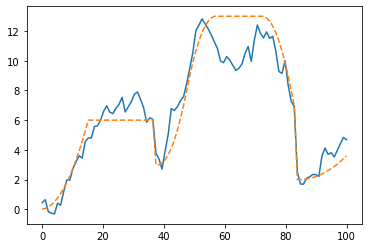

In [228]:
t = data["time"]
predicted_speed = []
dt = 100/len(t)
for i in range(len(t)):
    SPEED , SPEED_VARIANCE = SPEED_UPDATE(data["vel"][i],SPEED_VARIANCE_READING,SPEED,SPEED_VARIANCE,dt , data["acceleration"][i])
    predicted_speed.append(SPEED)    

plt.plot(t,predicted_speed)
# plt.plot(t,data["vel"])
plt.plot(t,data_orig["vel"] , linestyle = "dashed")

# Applying the kalman filter for Position

## INITIALIZE

In [229]:
POS = 0
POS_VARIANCE_READING = 100 #KNOW FROM EXPERIMENTATION
POS_VARIANCE = 1000

## PREDICT

In [230]:
def POS_PREDICT(dt,pos,speed,a):
    return pos + (speed*dt) 

## UPDATE

In [231]:
def POS_UPDATE(reading_mean,reading_variance,current_pos,current_variance , dt , current_acceleration , current_speed):
    prediction_mean = POS_PREDICT(dt,current_pos,current_speed,current_acceleration)
    k = current_variance/(current_variance + reading_variance)
    current_pos = prediction_mean + k*(reading_mean - prediction_mean)
    current_variance = current_variance - (k*current_variance)
    return current_pos , current_variance

Text(0, 0.5, 'Position (m)')

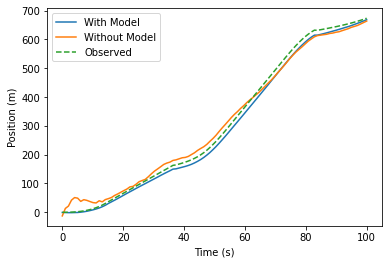

In [232]:
t = data["time"]
predicted_pos = []
dt = 100/len(t)
for i in range(len(t)):
    POS , POS_VARIANCE = POS_UPDATE(data["pos"][i],POS_VARIANCE_READING,POS,POS_VARIANCE,dt , data["acceleration"][i] ,predicted_speed[i])
    predicted_pos.append(POS)    

# plt.plot(t,predicted_speed)
# plt.plot(t,data_orig["vel"] , linestyle = "dashed")
# plt.figure()
    

with open('posdata.json') as f:
    posdata = json.load(f)

plt.plot(t,posdata["pos"])
plt.plot(t,predicted_pos)
plt.plot(t,data_orig["pos"] , linestyle = "dashed")
plt.legend(["With Model","Without Model","Observed"])
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")



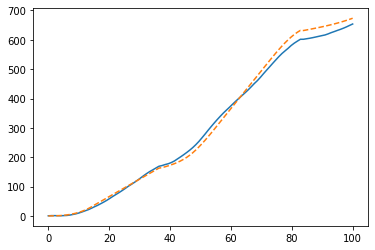

In [233]:
## INITIALIZE
with open('data.json') as f:
    data = json.load(f)
POS = 0
POS_VARIANCE_READING = 50 #KNOW FROM EXPERIMENTATION
POS_VARIANCE = 0

## PREDICT

def POS_PREDICT(dt,pos,speed,a):
    return pos + (speed*dt) + (0.5*a*dt*dt)

## UPDATE

def POS_UPDATE(reading_mean,reading_variance,current_pos,current_variance , dt , current_acceleration , current_speed):
    prediction_mean = POS_PREDICT(dt,current_pos,current_speed,current_acceleration)
    k = current_variance/(current_variance + reading_variance)
    current_pos = prediction_mean + k*(reading_mean - prediction_mean)
    current_variance = current_variance - (k*current_variance)
    return current_pos , current_variance

t = data["time"]
predicted_pos = []
dt = 100/len(t)
for i in range(len(t)):
    POS , POS_VARIANCE = POS_UPDATE(data["pos"][i],POS_VARIANCE_READING,POS,POS_VARIANCE,dt , data["acceleration"][i] , predicted_speed[i])
    predicted_pos.append(POS)    


plt.plot(t,predicted_pos)
plt.plot(t,data_orig["pos"] , linestyle = "dashed")

Text(0, 0.5, 'Velocity (m/s)')

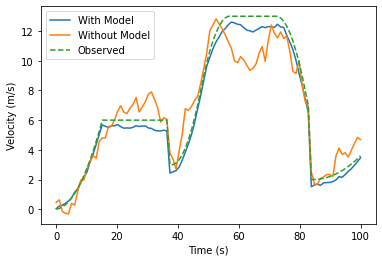

In [235]:
## INITIALIZE
with open('data.json') as f:
    data = json.load(f)
SPEED = 0
SPEED_VARIANCE_READING = 3 #KNOW FROM EXPERIMENTATION
SPEED_VARIANCE = 1

## PREDICT

def SPEED_PREDICT(dt,speed,a):
    return speed + a*dt

## UPDATE

def SPEED_UPDATE(reading_mean,reading_variance,current_speed,current_variance , dt , current_acceleration):
    prediction_mean = SPEED_PREDICT(dt,current_speed,current_acceleration)
    k = current_variance/(current_variance + reading_variance)
    current_speed = prediction_mean + k*(reading_mean - prediction_mean)
    current_variance = current_variance - (k*current_variance)
    return current_speed , current_variance

t = data["time"]
predicted_speed2 = []
dt = 100/len(t)
for i in range(len(t)):
    SPEED , SPEED_VARIANCE = SPEED_UPDATE(data["vel"][i],SPEED_VARIANCE_READING,SPEED,SPEED_VARIANCE,dt , data["acceleration"][i])
    predicted_speed2.append(SPEED)    

plt.plot(t,predicted_speed2)
plt.plot(t,predicted_speed)


plt.plot(t,data_orig["vel"] ,  linestyle = "dashed")
plt.legend(["With Model","Without Model","Observed"])
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")

# plt.plot(t,data_orig["vel"] , linestyle = "dashed")

Text(0, 0.5, 'accelation (m/s^2)')

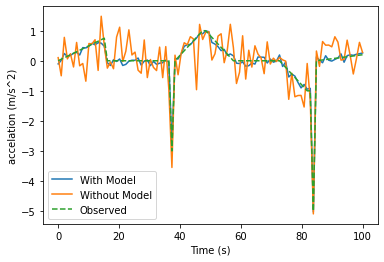

In [219]:
plt.plot(t,data["acceleration"])
plt.plot(t,data["acceleration"] + 0.5*np.array([np.random.randn() for _ in range(100)]))
plt.plot(t,data_orig["acceleration"],linestyle = "dashed")
plt.legend(["With Model","Without Model","Observed"])
plt.xlabel("Time (s)")
plt.ylabel("accelation (m/s^2)")

In [220]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
print(rmse(np.array(predicted_speed),np.array(data_orig["vel"])))

2.658558811750697
